# Tpm2 PSI

In [9]:
import pandas as pd
import scanpy as sc

In [10]:
adata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/mouse_forelimb/run_BRIE/rerunBRIE/diffgene/threegene_brie_out.h5ad')
adata

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 70376 × 3
    obs: 'sample', 'barcode_used_in_scTail', 'cell_type', 'batch', 'doublet_scores', 'nCount_RNA', 'nFeatures_RNA', 'percent_mito', 'stage', 'n_counts', 'doublet_corrected_p', 'doublet_corrected_p_less_than_0_1'
    var: 'gene_ids', 'feature_types', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'X_tsne', 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'

In [11]:
adata.obs['cell_type'].unique().tolist()

['Chondrocyte ',
 'Mesenchymal 2 ',
 'Epithelial 1 ',
 'Fibroblast ',
 'Perichondrial',
 'Endothelial ',
 'Ihh+ chondrocyte ',
 'Mesenchymal 1 ',
 'Early erythrocyte ',
 'Muscle 2 ',
 'Muscle 3 ',
 'Col1a1+ muscle 4 ',
 'Macrophage ',
 'Neural crest ',
 'Megakaryocyte ',
 'Muscle 4 ',
 'Tenocyte ',
 'Muscle 1 ',
 'Epithelial 2 ',
 'Foxp1+ perichondrial ',
 'EMP ',
 'Stressed mesenchymal ',
 'Late erythrocyte ',
 'Smooth muscle ',
 'Osteoblast ']

In [12]:
mesenchymaladata=adata[adata.obs['cell_type'].isin(['Muscle 1 ','Muscle 2 ','Muscle 3 ','Muscle 4 ']),:]
mesenchymaladata

View of AnnData object with n_obs × n_vars = 5971 × 3
    obs: 'sample', 'barcode_used_in_scTail', 'cell_type', 'batch', 'doublet_scores', 'nCount_RNA', 'nFeatures_RNA', 'percent_mito', 'stage', 'n_counts', 'doublet_corrected_p', 'doublet_corrected_p_less_than_0_1'
    var: 'gene_ids', 'feature_types', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'X_tsne', 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'

In [13]:
psidf=pd.DataFrame(mesenchymaladata.layers['Psi'],index=mesenchymaladata.obs.index,columns=mesenchymaladata.var['gene_name'])
psidf

gene_name,Hes1,Pim1,Tpm2
original_barcode,,,
limb12_13_0AAAGATGCAGTTTACG_1,0.546841,0.329689,0.609782
limb12_13_0AAAGATGGTTACGGAG_1,0.519939,0.338117,0.607711
limb12_13_0AAAGCAACAAACTGTC_1,0.519939,0.338117,0.612882
limb12_13_0AAAGCAACATGCCTTC_1,0.548978,0.338117,0.601722
limb12_13_0AAAGCAATCATCGCTC_1,0.576549,0.338117,0.594608
...,...,...,...
limb8_15_0TTTGGTTAGACAAAGG_1,0.535521,0.355541,0.479318
limb8_15_0TTTGGTTAGTACCGGA_1,0.569610,0.364234,0.478345
limb8_15_0TTTGGTTCAAGTCATC_1,0.569610,0.354777,0.474266


In [14]:
tsnedf=pd.DataFrame(mesenchymaladata.obsm['X_tsne'],index=mesenchymaladata.obs.index,columns=['tsne1','tsne2'])
tsnedf

,tsne1,tsne2
original_barcode,,
limb12_13_0AAAGATGCAGTTTACG_1,6.197584,-21.876320
limb12_13_0AAAGATGGTTACGGAG_1,1.724616,-22.678232
limb12_13_0AAAGCAACAAACTGTC_1,-14.649875,-23.035968
limb12_13_0AAAGCAACATGCCTTC_1,2.959098,-23.585481
limb12_13_0AAAGCAATCATCGCTC_1,6.958567,-22.280623
...,...,...
limb8_15_0TTTGGTTAGACAAAGG_1,-7.070150,-27.093677
limb8_15_0TTTGGTTAGTACCGGA_1,-1.922122,-26.324989
limb8_15_0TTTGGTTCAAGTCATC_1,7.749833,-24.897447


In [15]:
alldf=pd.concat([psidf,tsnedf],axis=1)
alldf

,Hes1,Pim1,Tpm2,tsne1,tsne2
original_barcode,,,,,
limb12_13_0AAAGATGCAGTTTACG_1,0.546841,0.329689,0.609782,6.197584,-21.876320
limb12_13_0AAAGATGGTTACGGAG_1,0.519939,0.338117,0.607711,1.724616,-22.678232
limb12_13_0AAAGCAACAAACTGTC_1,0.519939,0.338117,0.612882,-14.649875,-23.035968
limb12_13_0AAAGCAACATGCCTTC_1,0.548978,0.338117,0.601722,2.959098,-23.585481
limb12_13_0AAAGCAATCATCGCTC_1,0.576549,0.338117,0.594608,6.958567,-22.280623
...,...,...,...,...,...
limb8_15_0TTTGGTTAGACAAAGG_1,0.535521,0.355541,0.479318,-7.070150,-27.093677
limb8_15_0TTTGGTTAGTACCGGA_1,0.569610,0.364234,0.478345,-1.922122,-26.324989
limb8_15_0TTTGGTTCAAGTCATC_1,0.569610,0.354777,0.474266,7.749833,-24.897447


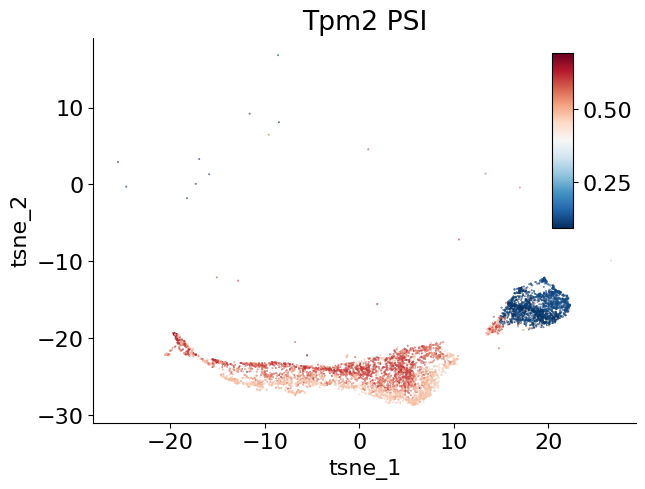

In [18]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

fig,ax=plt.subplots(figsize=(7,5))
sc=plt.scatter(alldf['tsne1'], alldf['tsne2'], c=alldf['Tpm2'], cmap='RdBu_r',s=0.1)
position=fig.add_axes([0.78,0.5,0.03,0.35])
plt.colorbar(sc,cax=position)
#plt.set_cmap('RdBu_r')
#plt.colorbar(shrink=0.6,pad=0.01)
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
# plt.xticks("")
# plt.yticks("")
ax.set_title('Tpm2 PSI')
# ax.set_xticks([])
# ax.set_yticks([])


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)



outputpath='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_forelimb/figure/PSI_fig/TPM2_psi.pdf'
fig.savefig(outputpath,dpi=300,bbox_inches='tight')
plt.show()

# Pim1 PSI

In [1]:
import pandas as pd
import scanpy as sc

In [2]:
adata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/mouse_forelimb/run_BRIE/rerunBRIE/diffgene/threegene_brie_out.h5ad')
adata

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 70376 × 3
    obs: 'sample', 'barcode_used_in_scTail', 'cell_type', 'batch', 'doublet_scores', 'nCount_RNA', 'nFeatures_RNA', 'percent_mito', 'stage', 'n_counts', 'doublet_corrected_p', 'doublet_corrected_p_less_than_0_1'
    var: 'gene_ids', 'feature_types', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'X_tsne', 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'

In [3]:
adata.obs['cell_type'].unique().tolist()

['Chondrocyte ',
 'Mesenchymal 2 ',
 'Epithelial 1 ',
 'Fibroblast ',
 'Perichondrial',
 'Endothelial ',
 'Ihh+ chondrocyte ',
 'Mesenchymal 1 ',
 'Early erythrocyte ',
 'Muscle 2 ',
 'Muscle 3 ',
 'Col1a1+ muscle 4 ',
 'Macrophage ',
 'Neural crest ',
 'Megakaryocyte ',
 'Muscle 4 ',
 'Tenocyte ',
 'Muscle 1 ',
 'Epithelial 2 ',
 'Foxp1+ perichondrial ',
 'EMP ',
 'Stressed mesenchymal ',
 'Late erythrocyte ',
 'Smooth muscle ',
 'Osteoblast ']

In [4]:
mesenchymaladata=adata[adata.obs['cell_type'].isin(['Mesenchymal 1 ','Mesenchymal 2 ']),:]
mesenchymaladata

View of AnnData object with n_obs × n_vars = 35761 × 3
    obs: 'sample', 'barcode_used_in_scTail', 'cell_type', 'batch', 'doublet_scores', 'nCount_RNA', 'nFeatures_RNA', 'percent_mito', 'stage', 'n_counts', 'doublet_corrected_p', 'doublet_corrected_p_less_than_0_1'
    var: 'gene_ids', 'feature_types', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'X_tsne', 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'

In [5]:
psidf=pd.DataFrame(mesenchymaladata.layers['Psi'],index=mesenchymaladata.obs.index,columns=mesenchymaladata.var['gene_name'])
psidf

gene_name,Hes1,Pim1,Tpm2
original_barcode,,,
limb12_13_0AAACCTGAGATGAGAG_1,0.519939,0.338117,0.601722
limb12_13_0AAACCTGCACAAGCCC_1,0.519939,0.338117,0.597871
limb12_13_0AAACCTGCACGTAAGG_1,0.519939,0.338117,0.601722
limb12_13_0AAACCTGCAGTCGTGC_1,0.547807,0.338117,0.593221
limb12_13_0AAACCTGCATCACAAC_1,0.517346,0.338117,0.601722
...,...,...,...
limb8_15_0TTTGCGCTCAGAAATG_1,0.569610,0.364234,0.478345
limb8_15_0TTTGCGCTCTGGTATG_1,0.509140,0.364234,0.478345
limb8_15_0TTTGTCAAGTGTACTC_1,0.569610,0.364234,0.478345


In [6]:
tsnedf=pd.DataFrame(mesenchymaladata.obsm['X_tsne'],index=mesenchymaladata.obs.index,columns=['tsne1','tsne2'])
tsnedf

,tsne1,tsne2
original_barcode,,
limb12_13_0AAACCTGAGATGAGAG_1,-1.210241,3.804604
limb12_13_0AAACCTGCACAAGCCC_1,-6.696382,-4.873115
limb12_13_0AAACCTGCACGTAAGG_1,-1.762304,-7.703755
limb12_13_0AAACCTGCAGTCGTGC_1,-6.959012,-11.632064
limb12_13_0AAACCTGCATCACAAC_1,1.102349,-13.692115
...,...,...
limb8_15_0TTTGCGCTCAGAAATG_1,4.640288,0.080840
limb8_15_0TTTGCGCTCTGGTATG_1,4.058230,-4.623927
limb8_15_0TTTGTCAAGTGTACTC_1,10.338694,1.532790


In [7]:
alldf=pd.concat([psidf,tsnedf],axis=1)
alldf

,Hes1,Pim1,Tpm2,tsne1,tsne2
original_barcode,,,,,
limb12_13_0AAACCTGAGATGAGAG_1,0.519939,0.338117,0.601722,-1.210241,3.804604
limb12_13_0AAACCTGCACAAGCCC_1,0.519939,0.338117,0.597871,-6.696382,-4.873115
limb12_13_0AAACCTGCACGTAAGG_1,0.519939,0.338117,0.601722,-1.762304,-7.703755
limb12_13_0AAACCTGCAGTCGTGC_1,0.547807,0.338117,0.593221,-6.959012,-11.632064
limb12_13_0AAACCTGCATCACAAC_1,0.517346,0.338117,0.601722,1.102349,-13.692115
...,...,...,...,...,...
limb8_15_0TTTGCGCTCAGAAATG_1,0.569610,0.364234,0.478345,4.640288,0.080840
limb8_15_0TTTGCGCTCTGGTATG_1,0.509140,0.364234,0.478345,4.058230,-4.623927
limb8_15_0TTTGTCAAGTGTACTC_1,0.569610,0.364234,0.478345,10.338694,1.532790


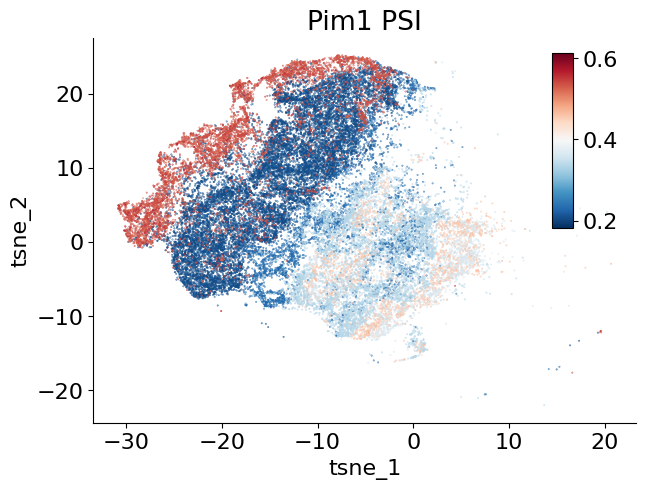

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

fig,ax=plt.subplots(figsize=(7,5))
sc=plt.scatter(alldf['tsne1'], alldf['tsne2'], c=alldf['Pim1'], cmap='RdBu_r',s=0.1)
position=fig.add_axes([0.78,0.5,0.03,0.35])
plt.colorbar(sc,cax=position)
#plt.set_cmap('RdBu_r')
#plt.colorbar(shrink=0.6,pad=0.01)
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
# plt.xticks("")
# plt.yticks("")
ax.set_title('Pim1 PSI')
# ax.set_xticks([])
# ax.set_yticks([])


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)



#outputpath='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_forelimb/figure/PSI_fig/pim1_psi.pdf'
#fig.savefig(outputpath,dpi=300,bbox_inches='tight')
plt.show()